# Genetic Algorithm

Genetic Algorithms (GAs) are a class of evolutionary algorithms inspired by the process of natural selection that belong to the larger class of evolutionary algorithms (EA). Genetic algorithms are commonly used to generate high-quality solutions to optimization and search problems by relying on bio-inspired operators such as mutation, crossover, and selection. These algorithms reflect the process of natural selection where the fittest individuals are selected for reproduction to produce offspring of the next generation.

**Key Concepts**
* Population: A set of candidate solutions to the given problem. Each candidate solution has a set of properties (its chromosomes or genotype) which can be mutated and altered.
* Chromosomes: A representation of a candidate solution. Often represented as strings of binary values, but can be represented by other structures depending on the problem domain.
* Fitness Function: A function that evaluates and assigns a fitness score to each candidate solution in the population. The fitness score determines how good a solution is.
* Selection: The process of choosing the fittest individuals from the population for reproduction. Selection methods include roulette wheel selection, tournament selection, etc.
* Crossover (Recombination): A genetic operator used to combine the genetic information of two parents to generate new offspring. It is one way to stochastically generate new solutions from an existing population.
* Mutation: A genetic operator that alters one or more gene values in a chromosome from its initial state. This process introduces new genetic structures in the population by changing the chromosomes of the offspring.
* Termination: The algorithm terminates when either a maximum number of generations have been produced, or a satisfactory fitness level has been reached for the population.

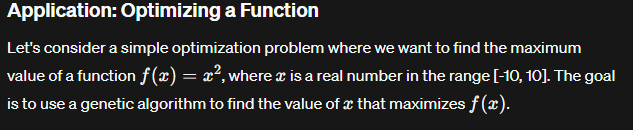

In [2]:
import numpy as np

def fitness(x):
    return x ** 2

def initialize_population(size, bounds):
    return np.random.uniform(bounds[0], bounds[1], size).reshape(size, 1)

def select_parents(population, fitnesses, num_parents):
    parents = np.zeros((num_parents, 1))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitnesses == np.max(fitnesses))[0][0]
        parents[i, :] = population[max_fitness_idx, :]
        fitnesses[max_fitness_idx] = -np.inf  # Use -inf to mark as used
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k + 1) % parents.shape[0]
        offspring[k, :crossover_point] = parents[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutate(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, :] += random_value
    return offspring_crossover

# Genetic algorithm parameters
population_size = 10
num_generations = 50
num_parents_mating = 4
bounds = (-10, 10)

# Initialization
population = initialize_population(population_size, bounds)

# Evolution
for generation in range(num_generations):
    fitnesses = np.array([fitness(ind[0]) for ind in population])
    parents = select_parents(population, fitnesses, num_parents_mating)
    offspring_crossover = crossover(parents, (population_size - parents.shape[0], 1))
    offspring_mutation = mutate(offspring_crossover)
    population[:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

# Results
best_solution = population[np.argmax([fitness(ind[0]) for ind in population])]
best_solution_fitness = fitness(best_solution[0])
print(f"Best solution: {best_solution[0]}")
print(f"Best solution fitness: {best_solution_fitness}")


Best solution: -32.29433411953704
Best solution fitness: 1042.9240162242943


# 8 Queen Problem

In [3]:
import random

def fitness(perm):
    # Calculate the number of non-attacking pairs of queens (i.e., number of conflicts)
    N = len(perm)
    conflicts = 0
    for i in range(N):
        for j in range(i + 1, N):
            if perm[i] == perm[j] or abs(perm[i] - perm[j]) == abs(i - j):
                conflicts += 1
    return N * (N - 1) // 2 - conflicts

def generate_random_permutation(N):
    return random.sample(range(N), N)

def crossover(parent1, parent2):
    N = len(parent1)
    crossover_point = random.randint(1, N - 1)
    child1 = parent1[:crossover_point] + [x for x in parent2 if x not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [x for x in parent1 if x not in parent2[:crossover_point]]
    return child1, child2

def mutate(perm, mutation_rate):
    N = len(perm)
    for i in range(N):
        if random.random() < mutation_rate:
            j = random.randint(0, N - 1)
            perm[i], perm[j] = perm[j], perm[i]
    return perm

def genetic_algorithm(N, population_size, mutation_rate, max_generations):
    population = [generate_random_permutation(N) for _ in range(population_size)]

    for generation in range(max_generations):
        fitness_scores = [fitness(perm) for perm in population]
        best_perm = population[fitness_scores.index(max(fitness_scores))]

        if max(fitness_scores) == N * (N - 1) // 2:
            return best_perm

        mating_pool = random.choices(population, weights=fitness_scores, k=population_size)
        new_population = []

        for _ in range(population_size // 2):
            parent1, parent2 = random.sample(mating_pool, 2)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

    return best_perm

def print_board(perm):
    N = len(perm)
    for row in range(N):
        line = ['.'] * N
        line[perm[row]] = 'Q'
        print(' '.join(line))

# Example usage:
N = 8
population_size = 100
mutation_rate = 0.05
max_generations = 1000

solution = genetic_algorithm(N, population_size, mutation_rate, max_generations)
print_board(solution)


. . Q . . . . .
Q . . . . . . .
. . . . . . Q .
. . . . Q . . .
. . . . . . . Q
. Q . . . . . .
. . . Q . . . .
. . . . . Q . .
